### Add the scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 6\Bati-Bank-Credit-Scoring\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Load the Data

In [4]:
PATH = "../data/data.csv"

data = pd.read_csv(PATH)

### Start of EDA

In [5]:
from scripts.exploratory_data_analyzer import EDAAnalyzer

# initialize the EDA analyzer
eda_analyzer = EDAAnalyzer(data=data)

#### 1. Basic Overview and summary statistics 

- Get basic info of the data's structure and column type definitions

In [6]:
eda_analyzer.basic_overview()

The data has a shape of: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-n

- Generate descriptive statistics for the numerical data

In [7]:
eda_analyzer.summary_statistics()

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


- Missing data identification

In [8]:
eda_analyzer.missing_values()

These are columns with missing values greater than 0%:
Series([], dtype: float64)


**Observations**:
- The transactional data has no missing values, this indicates that the data collection is well structured and seems not that error prone


#### 2. Univariate Analysis

- #### Numerical column distributions

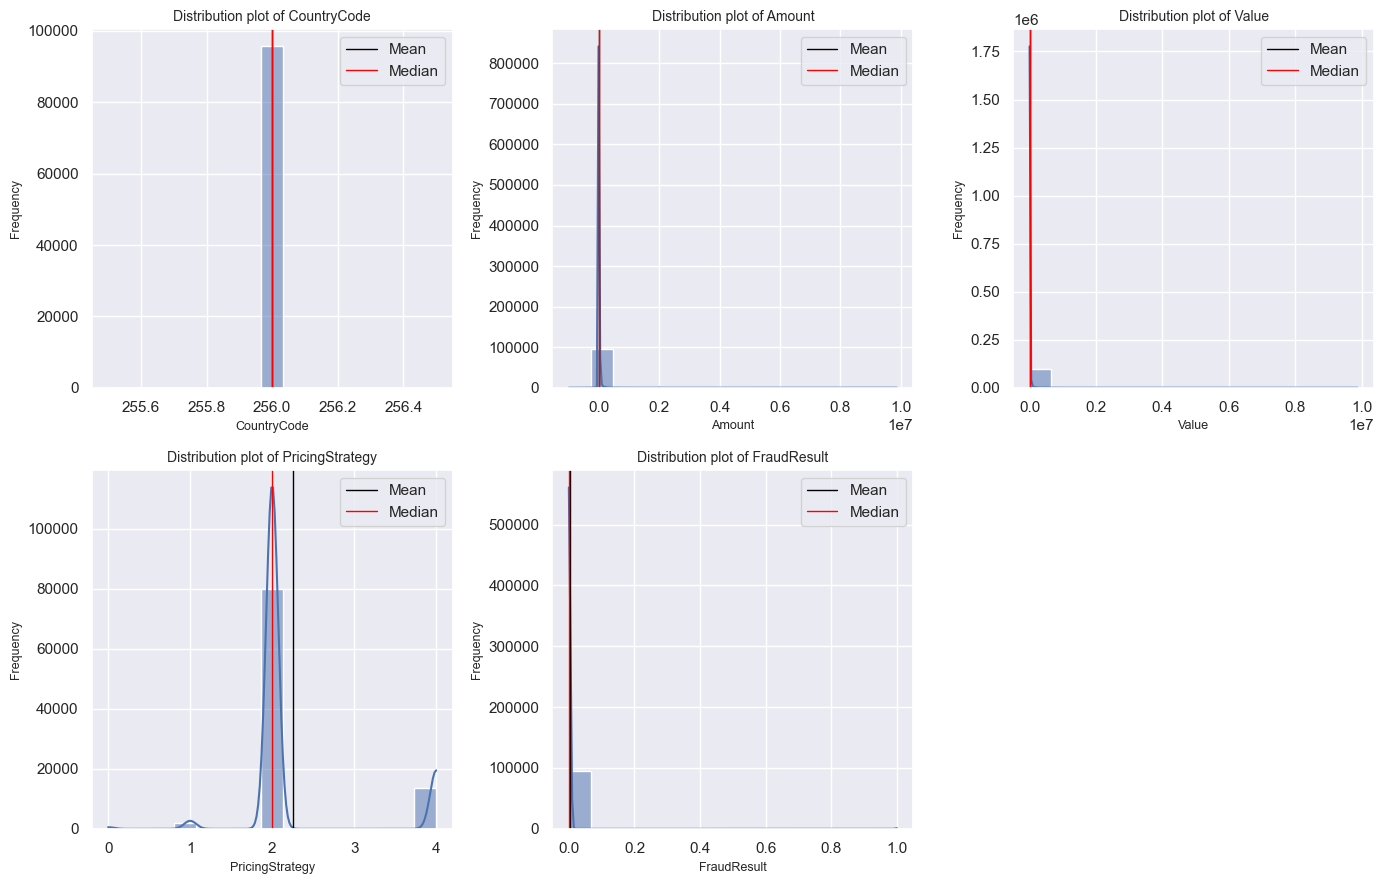

In [9]:
eda_analyzer.numerical_distribution()

**Observations** : 
- The countryCode found in the data set is uniform, indicating that Bati Bank operates mainly in one country. Well at least in regards to the data at hand.
- Amount, Value, PricingStrategy and FraudResult are right skewed. Showing that there might be some outlires that drag the mean to the right extreem

- #### Investigate the skewness of the numerical columns

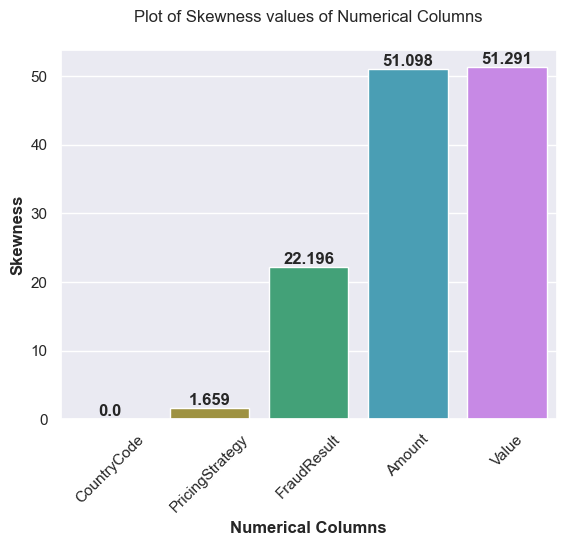

In [10]:
eda_analyzer.describe_skewness()

In addition to the distribution plot the skewness analysis helps us confidently conclude that:
- **CountryCode**: doesn't have any skewness. This means that all of the transactions are from one country. The countryCode of this country is 256.
- **PricingStrategy**: has a small but positive skewness value. This means that it is right skewed but not to extreem degree. This means that most of the customers are being offered the same pricing structure except a few customers.
- **FraudResult**: has a relatively larger skewness value. This indicates that even tough most of the data points are low, in this case 0 or no fraud, there are some values that are high , again in this case 1 or fraud. 
- **Amount** and **Value**: both have values about 51, which is highly skewed. This indicates that the users of mostly move small amounts but the average value is inflated by large sums moved by wealthy users of the bank.

- #### Categorical Column Distribution

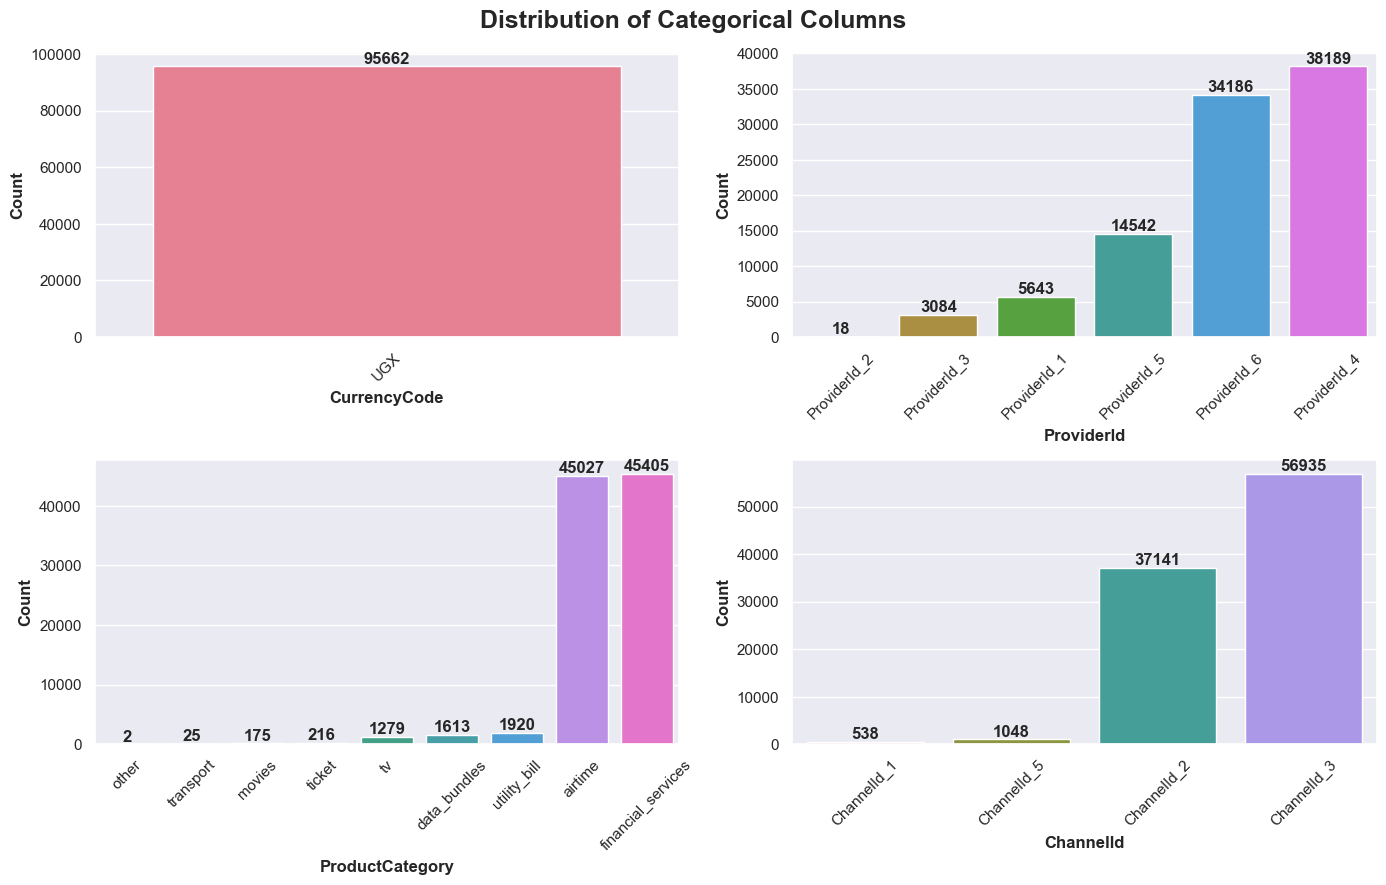

In [11]:
eda_analyzer.categorical_distribution()

From the distribution plot of the categorical values we can conclude the following:
1. Bati bank only handles one type of currency, that is 'UGX'. This is the currency of **Uganda**, which is the **Ugandan Shilling**. So we can say that the bank is located in, if only used by citizens of, Uganda.
2. The sources, providers, of the items bought and sold are from 6 providers. The following are the distribution of providers:
   - **Provider_2** is a source for only **18** transactions, which is the least amongst the other 5 providers.
   - **Provider_3** and **Provider_1** are responsible for a small but a fair share amount of transactions, where they account for **3084** and **5643** transactions respectively.
   - **Provider_5** is a source for **14542** transactions, which occupies a moderate amount of transactions.
   - **Provider_6** and **Provider_4** account for the majority of the transactions, where they account for **34186** and **38189** transactions respectively.

3. There are a total of 9 product categories that represent the items bought/sold in the transactions.
   - **other**, **transport**, **movies** and **ticket** account for miniscule amounts of transactions. They account for **2**, **25**, **175** and **216** transactions respectively.
   - **tv**, **data_bundles** and **utility_bill** account for moderate amounts of transactions, in the thousands. They account for **1279**, **1613** and **1920** transactions respectively.
4. As of the channels, methods of access (Web, Android, IOS or checkout), the most dominant channels are **ChannelId_2** and **ChannelId_3** with **37141** and **56935** transactions coming through them respectively. **ChannelId_1** and **ChannelId_5** account for **538** and **1048** transactions respectively which makes them the least used channels for the transactions. 

#### 3. Bivariate Analysis

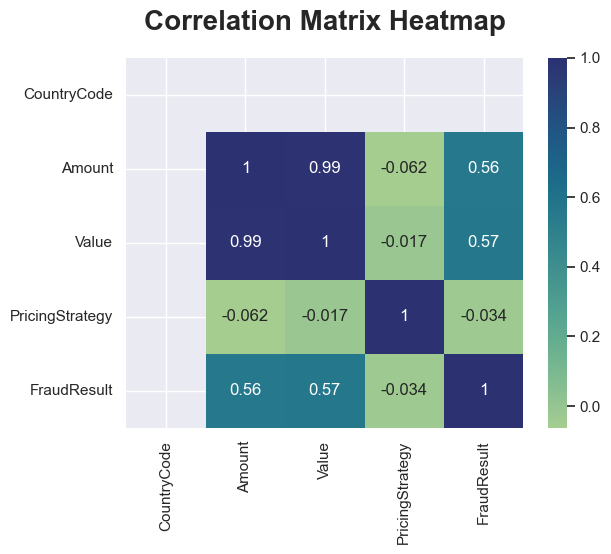

In [12]:
eda_analyzer.correlation_analysis()

From the heatmap we can conclude that:
- **Amount** and **Value** have a correlation of **0.99**. This is because that simply **Value** is the absolute value of **Amount**. The idea of having **Amount** have a sign, negative or positive, is to show the direction of transaction - i.e whether it was a sale or a purchase from the users perspective. So this high correlation is something expected.
- **FraudResult** has a relatively high relation with the **Amount/Value**. This is a postive correlation hence it is not far-fetched to say that when the **Amount/Value** **increases** the transaction is **more likely to be a fraud**.
- **PricingStrategy** has very little but negative correlation with all the other columns. The values are so miniscule that is hard to make any conclusion other than it has not effect. 